# First Deep Learning Model 

Model related to non-linear separable examples

In [0]:
#Import numpy: library for the linear algebra functions
import numpy as np
#Import libraries for graphics
%matplotlib inline
import matplotlib.pyplot as plt

## Simulated data set

In [0]:
#From the Scikit-learn import the make_circles function for generating the dataset
from sklearn.datasets import make_circles

In [0]:
# Make_circles generates n_samples points with 2 features with labels y=0, y=1 (Make a large circle containing a smaller circle in 2d)
X, y = make_circles(n_samples=1000,
                    noise=0.1,
                    factor=0.2,
                    random_state=0)

In [4]:
X.shape

(1000, 2)

Text(0.5, 1.0, 'Blue circles and Red crosses')

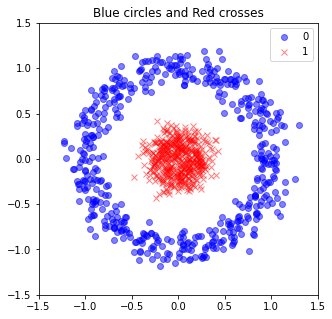

In [5]:
plt.figure(figsize=(5, 5))
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend(['0', '1'])
plt.title("Blue circles and Red crosses")

# Deep Learning Model


In [6]:
#Import the important classes from keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


### Define the model


In [0]:
model = Sequential()

In [0]:
model.add(Dense(4, input_shape=(2,), activation='tanh'))

In [0]:
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

### Fit the model

In [11]:
# We can define a number or epochs
model.fit(X, y, epochs=20)
# the output tell us certain loss, which seems to be drecreasing over time; and the accuracy, which seems to be increasing over time

Epoch 1/20
1000/1000 [==============================] - 0s 303us/step - loss: 0.6938 - accuracy: 0.5350
Epoch 2/20
1000/1000 [==============================] - 0s 40us/step - loss: 0.6636 - accuracy: 0.6460
Epoch 3/20
1000/1000 [==============================] - 0s 36us/step - loss: 0.5960 - accuracy: 0.7830
Epoch 4/20
1000/1000 [==============================] - 0s 32us/step - loss: 0.4985 - accuracy: 0.8440
Epoch 5/20
1000/1000 [==============================] - 0s 39us/step - loss: 0.4245 - accuracy: 0.8750
Epoch 6/20
1000/1000 [==============================] - 0s 34us/step - loss: 0.3641 - accuracy: 0.8800
Epoch 7/20
1000/1000 [==============================] - 0s 37us/step - loss: 0.2946 - accuracy: 0.9050
Epoch 8/20
1000/1000 [==============================] - 0s 39us/step - loss: 0.2188 - accuracy: 0.9650
Epoch 9/20
1000/1000 [==============================] - 0s 36us/step - loss: 0.1560 - accuracy: 1.0000
Epoch 10/20
1000/1000 [==============================] - 0s 35us/step - 

## Draw the decision boundary of the model


In [0]:
# Define a grid
hticks = np.linspace(-1.5, 1.5, 101) #Return evenly spaced numbers over a specified interval.
vticks = np.linspace(-1.5, 1.5, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()] # All the x1,x2 points in the interval [-1.5,1.5] 
#predict with the created model
c = model.predict(ab)
#reshape the prediction to have the same shape of the grid 
cc = c.reshape(aa.shape)

Text(0.5, 1.0, 'Blue circles and Red crosses')

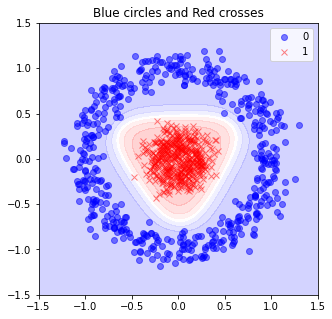

In [14]:
plt.figure(figsize=(5, 5))
plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2) 
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend(['0', '1'])
plt.title("Blue circles and Red crosses")